<a href="https://colab.research.google.com/github/ChecoZamora/Tensorflow_Certificate/blob/main/01_Neural_Network_Regression_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression problem
- Predicting how much, or how many

## Inputs and outputs of a regression model
- Encode variables, predictors or features
- The main predicted variable

In [1]:
# import tensorflow
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


## Creating data to view and fit

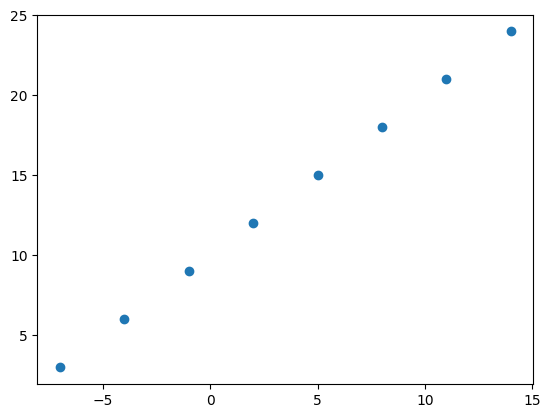

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X, y)
plt.show()

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
# y = X + 10
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [6]:
# Create demo tensor
# Turn pur numy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps i modelling with tensorflow

1. Creating a model - Define input and output layers, as well as hidden layers
2. Compiling a model - define the loss function, and the optimizer, and evaluation metrics
3. Fitting a model - Letting the model try to find patterns between X and y

### 1 Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

### 2 Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

### 3 Fit the model
model.fit(X_train, y_train, epochs=5)

### 4 Evaluate the model
model.evaluate(X_test, y_test)

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1 Create a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3 Fit the model
history = model.fit(tf.expand_dims(X, -1), y, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 532ms/step - loss: 18.3650 - mae: 18.3650
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 18.0837 - mae: 18.0837
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 17.8025 - mae: 17.8025
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 17.5212 - mae: 17.5212
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 17.2400 - mae: 17.2400
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 16.9587 - mae: 16.9587
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 16.6775 - mae: 16.6775
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 16.3962 - mae: 16.3962
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 16.1150 - mae: 16.1150
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 15.8337 - mae: 15.8337
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - l

dict_keys(['loss', 'mae'])


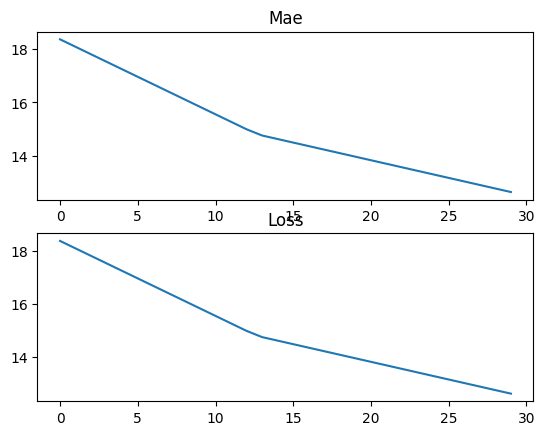

In [9]:
import matplotlib.pyplot as plt
print(history.history.keys())
figure, axis = plt.subplots(2)
axis[0].plot(history.history["mae"])
axis[0].set_title("Mae")
axis[1].plot(history.history["loss"])
axis[1].set_title("Loss")

plt.show()

In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Make a prediction using the model
model.predict(x=[17.0])

1/1 [==============================] - 0s 117ms/step


array([[3.8031816]], dtype=float32)

## Improving our model
- We can improve a model the steps we took to create a model
1. **Creating a model** - Add more layers, increase the number of hidden layers, and change the activation functions of each layer
2. **Compiling a model** - Change the optimizaion function, or the learning rate
3. **Fitting a model** - Add epochs, or give the model more data

In [12]:
X_full = np.array([-3.0])
y_full = np.array([7.0])
for i in range(1001):
  X_full = np.append(X_full, X_full[-1]+3)
  y_full = np.append(y_full, y_full[-1]+3)

X_full = tf.cast(tf.constant(X_full), dtype=tf.float32)
y_full = tf.cast(tf.constant(y_full), dtype=tf.float32)
X_full, y_full

(<tf.Tensor: shape=(1002,), dtype=float32, numpy=array([  -3.,    0.,    3., ..., 2994., 2997., 3000.], dtype=float32)>,
 <tf.Tensor: shape=(1002,), dtype=float32, numpy=array([   7.,   10.,   13., ..., 3004., 3007., 3010.], dtype=float32)>)

In [13]:
# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# Compile model
model_1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss=tf.keras.losses.mae, metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_full, -1), y_full, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 722.3803 - mae: 722.3803
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 44.1024 - mae: 44.1024
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 25.2060 - mae: 25.2060
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 12.4905 - mae: 12.4905
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 11.9538 - mae: 11.9538
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 42.0862 - mae: 42.0862
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 23.3780 - mae: 23.3780
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 27.8698 - mae: 27.8698
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 16.8177 - mae: 16.8177
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 39.2252 - mae: 39.2252
Epoch 11/500
32/32 [=================

In [14]:
model_1.predict([10.0])

1/1 [==============================] - 0s 95ms/step


array([[20.04375]], dtype=float32)

In [15]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 434ms/step - loss: 13.3981 - mae: 13.3981
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9649 - mae: 12.9649
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5340 - mae: 12.5340
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.1031 - mae: 12.1031
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6603 - mae: 11.6603
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2012 - mae: 11.2012
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7213 - mae: 10.7213
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2161 - mae: 10.2161
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6809 - mae: 9.6809
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1099 - mae: 9.1099
Epoch 11/100
1/1 [==============================] - 

In [16]:
# Predict
model_2.predict([10.0, 11.0, 12.0])

1/1 [==============================] - 0s 165ms/step


array([[19.02181 ],
       [20.83061 ],
       [22.639414]], dtype=float32)

## Improving a model

- Add layers
- Increase the number of hidden units
- Change the activation function
- Change the optimization function
- Change the learning rate
- Fitting on more data
- Fitting for longer


## Evaluating a model's performance

In practice the typicall workflow is
1. Build a model
2. Fit it
3. Evaluate it
4. Tweak the model
5. Fit it
6. Evaluate it
...




### When it comes to evaluation remember
> Visualize, visualize, visualize

It's a good idea to visualize:
1. The data
2. Model itself - What does our model look like
3. Traning of the model
4. Predictions

In [17]:
# Mae a bigger data set
X_1 = tf.range(-100, 100, 4)

y_1 = X_1 + 10

X_1, y_1

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

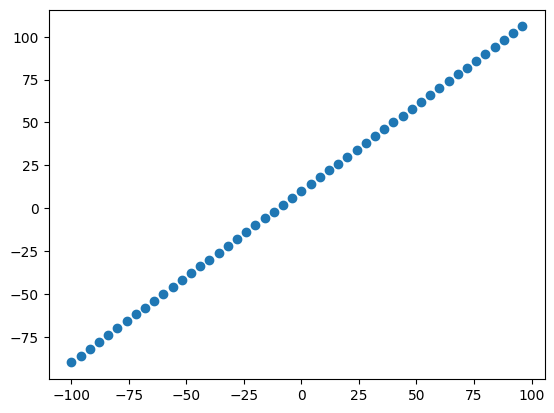

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_1, y_1)

### The 3 sets...
Split x and y into and 80% raining and 20% testing

1. **Traning** set - The model learns from this data 70 - 80%
2. **Validation** set - The model gets tunned with this data 10-15% (Optimizing)
3. **Test set** - The model gets evaluated on ghis data 10-15%

- Course Materials
- Practice Exam
- Final exam

In [19]:
# Check he lenght of how many samples we have
len(X_1)

50

In [20]:
# Split the data
X_train = X_1[:40]
X_test = X_1[40:]

y_train = y_1[:40]
y_test = y_1[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

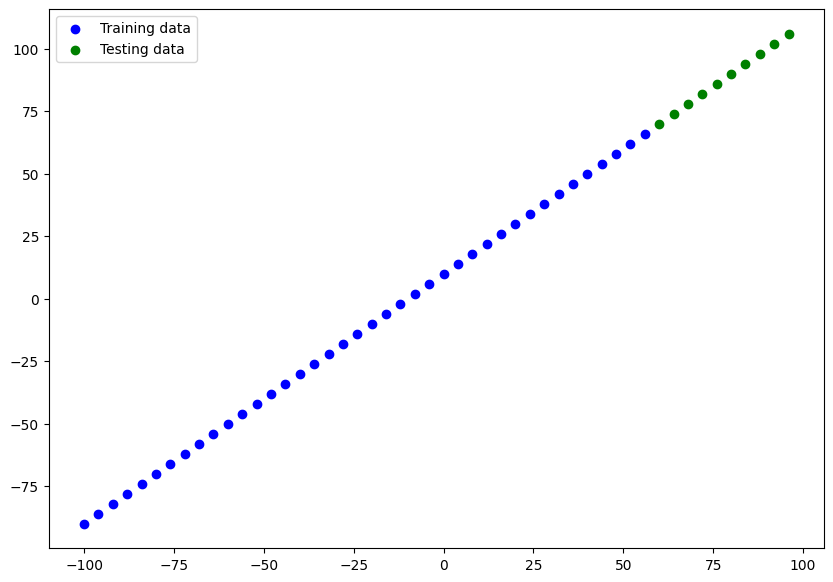

In [21]:
# Visualizing the data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [22]:
# Create a model

modell = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
modell.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Fit the model
modell.fit(tf.expand_dims(X_train, -1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 7ms/step - loss: 21.7789 - mae: 21.7789
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 9.4988 - mae: 9.4988
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 12.1614 - mae: 12.1614
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 9.3846 - mae: 9.3846
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 10.2673 - mae: 10.2673
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 9.5172 - mae: 9.5172
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 8.6423 - mae: 8.6423
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 9.0454 - mae: 9.0454
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 18.9412 - mae: 18.9412
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 10.2160 - mae: 10.2160
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 8.4346

### Vizualising the model


In [23]:
modell.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
X[0].shape

TensorShape([])

In [25]:
# Lets create a model wich builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model
model_x = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model_x.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit
model_x.fit(tf.expand_dims(X_train, -1), y_train, epochs=50, verbose=0)

In [26]:
model_x.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - Total number of parameters in the model
* **Trainable params** - These are the parameters, the patterns, the model can update as it trains
* **Non-Trainable params** - It works more for pre-trained models



**Weights and biases**
Traniable parameters


# MIT Introduction to deep learning

- Deep Fake Project
- VISTA (Open Source For Autonomous cars Synthetic generated environments)
- Generating images from Natural Language
- Build software that can build software


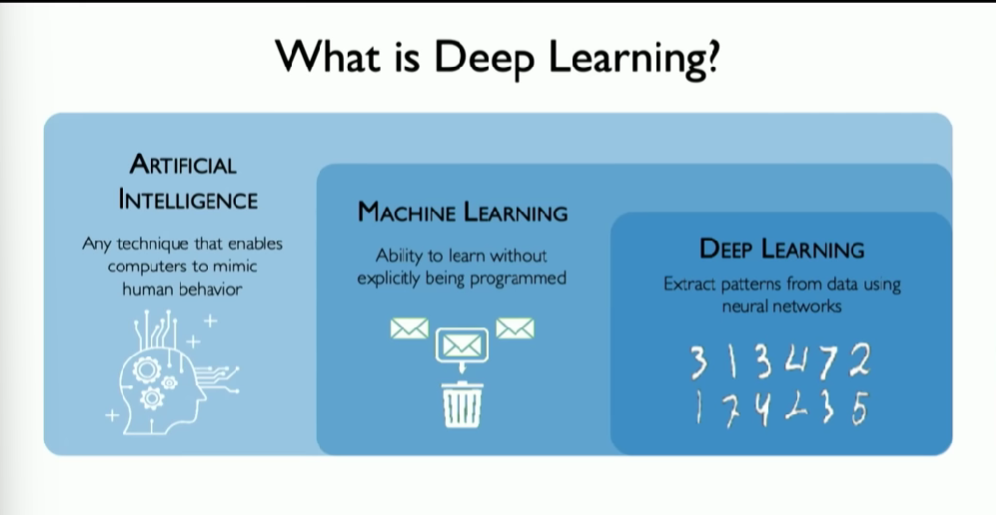

> Intelligence: Process information, to inform some future decision

**Deep Learning**
Extract Patterns from data using neural networks, that extract features in the data

### Projects

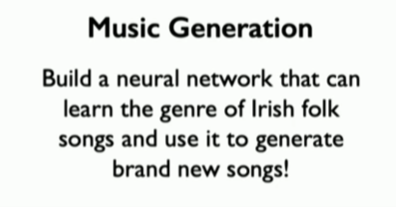

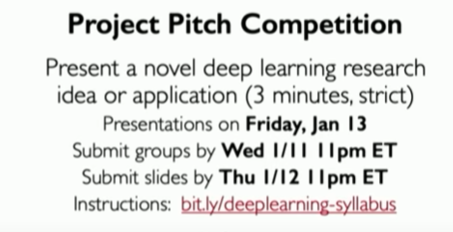

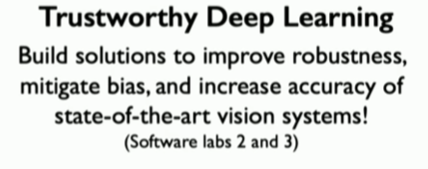

#### Why deep learning, and why now?

- Systems must be transformed by using deep learning and machine learning

**Key idea**:Have a machine, extract and define features automatcally

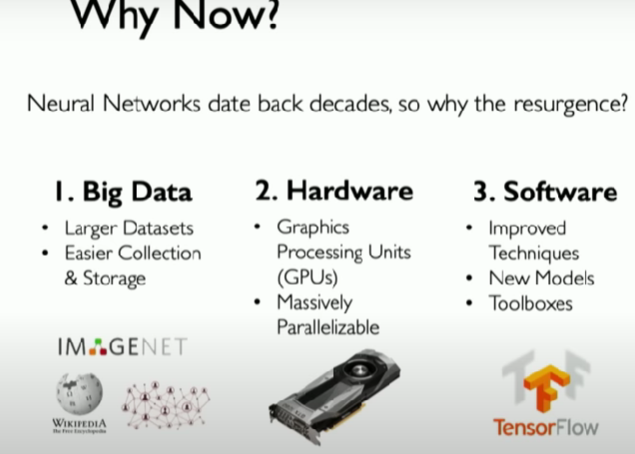

## Perceptron

Single neuron
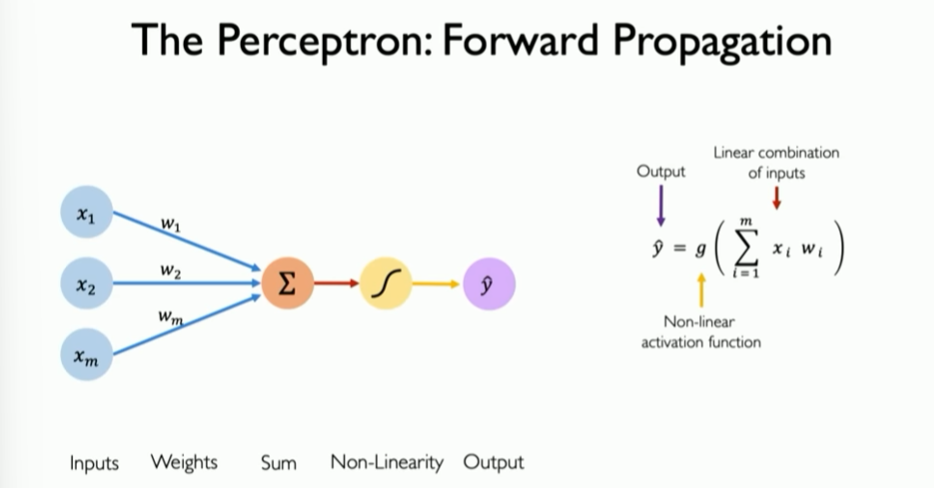

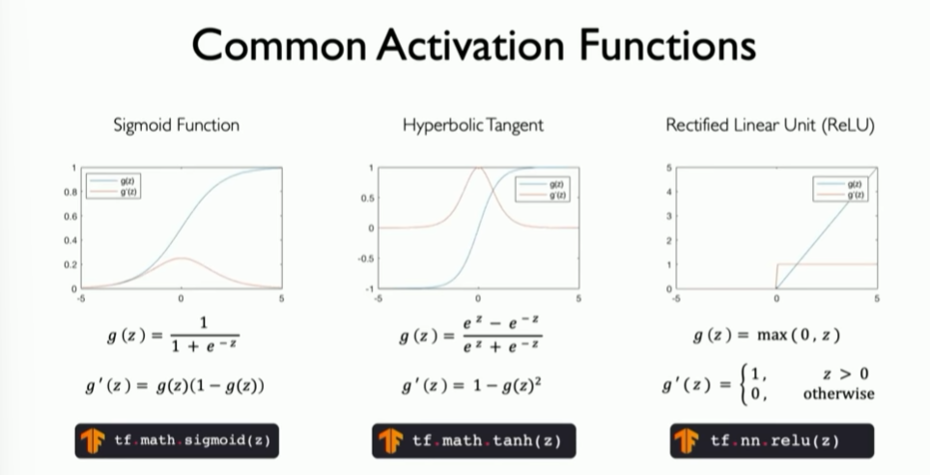

* Sigmoid - Probability bewteen 0 and 1
The activation of funcions if to introduce non-linearities into the network
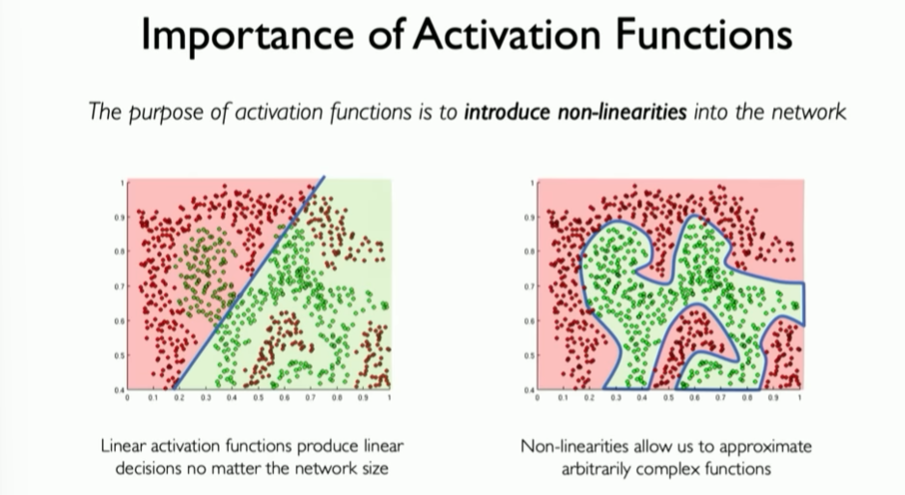

## Building NN with Perceptrons
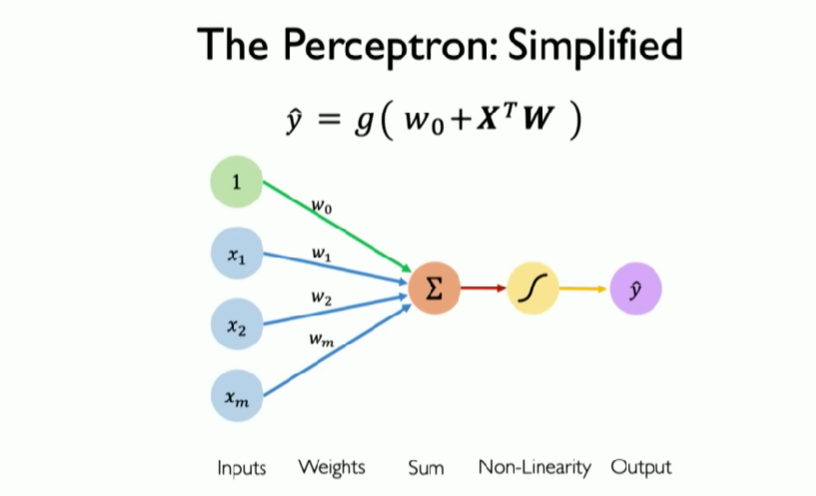

In [27]:
# Dense Layer from Scratch

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, input_dim, output_dim):
    super(MyDenseLayer, self).__init__()

    # Initialize weights and bias
    self.W = self.add_weight((input_dim, output_dim))
    self.b = self.add_weight([1, output_dim])

    def call(self, inputs):
      #Forward propagate the inputs
      z = tf.matmul(inputs, self.W) + self.b

      # Feed through a non-linear activation
      output = tf.math.sigmoid(z)

      return output

# All of the above is layer = tf.keras.layers.Dense(units=2)


Explanation:
This code defines a custom dense layer implementation called MyDenseLayer using TensorFlow. This dense layer consists of weights and biases, and it applies the sigmoid activation function to its output during the forward pass. Let's go through it step-by-step:

class MyDenseLayer(tf.keras.layers.Layer):

This line defines a new class called MyDenseLayer, which is a subclass of tf.keras.layers.Layer. This means our custom layer will inherit some functionalities from TensorFlow's base layer class.
def __init__(self, input_dim, output_dim):

This is the constructor method of the class. It is called when an instance of MyDenseLayer is created. The constructor takes two arguments, input_dim and output_dim, which represent the dimensions of the input and output of the dense layer, respectively.
super(MyDenseLayer, self).__init__()

This line calls the constructor of the parent class (tf.keras.layers.Layer) to ensure that the necessary initialization is performed for the custom layer.
self.W = self.add_weight((input_dim, output_dim))

Here, a weight matrix W is created for the dense layer using self.add_weight(). The weight matrix connects the neurons from the input layer to the neurons of the output layer. The shape of the weight matrix is determined by the input_dim and output_dim values provided during the layer's initialization.
self.b = self.add_weight([1, output_dim])

Similarly, a bias vector b is created for the dense layer using self.add_weight(). The bias vector is added to the output of the weighted input to introduce a level of flexibility and allow the model to capture complex relationships between features. The shape of the bias vector is [1, output_dim], where output_dim represents the number of neurons in the output layer.
def call(self, inputs):

This method defines the forward pass of the custom dense layer. It takes inputs as an argument, which represents the input tensor to the layer.
z = tf.matmul(inputs, self.W) + self.b

The input tensor is multiplied with the weight matrix W, and the bias vector b is added to the result. This step performs the linear transformation of the input features based on the learned weights and biases.
output = tf.math.sigmoid(z)

The sigmoid activation function is applied to the result of the linear transformation (z). The sigmoid function maps the output to the range [0, 1], making it suitable for binary classification problems or as a squashing function to introduce non-linearity in the neural network.
return output

The output tensor after the forward pass is returned.
Overall, this MyDenseLayer class defines a custom dense layer that applies a sigmoid activation function to its output during the forward pass. The layer can be used as a building block in a neural network to introduce non-linearity and perform binary classification tasks or other tasks where the output needs to be bounded between 0 and 1.

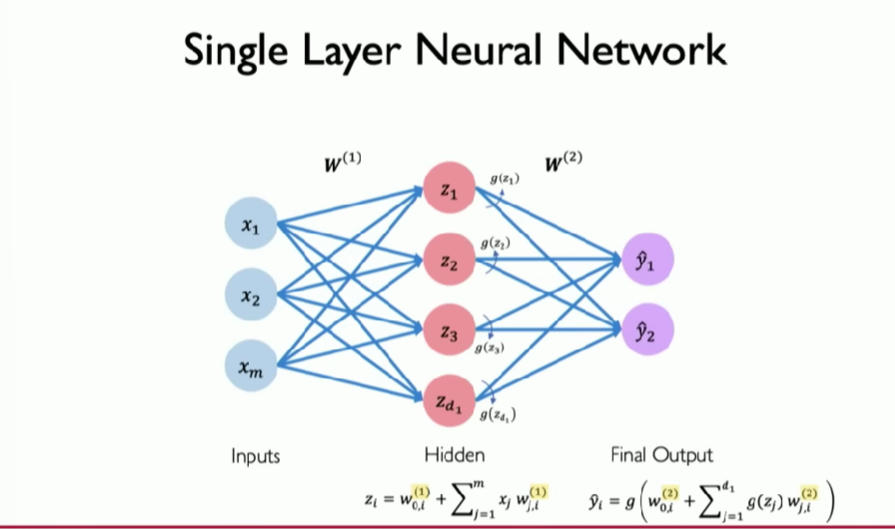

**Deep** Neural Network: Keep stacking layers of neurons on top of each other

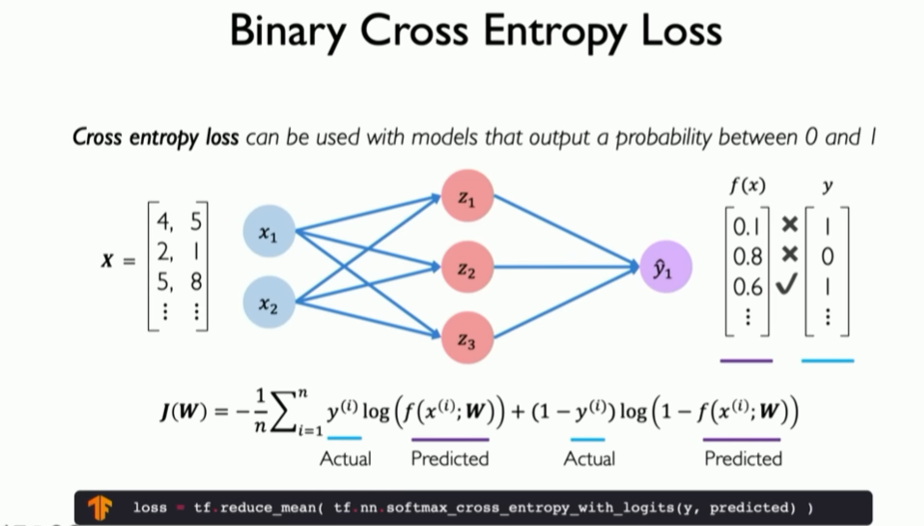

Compute loss gradient?
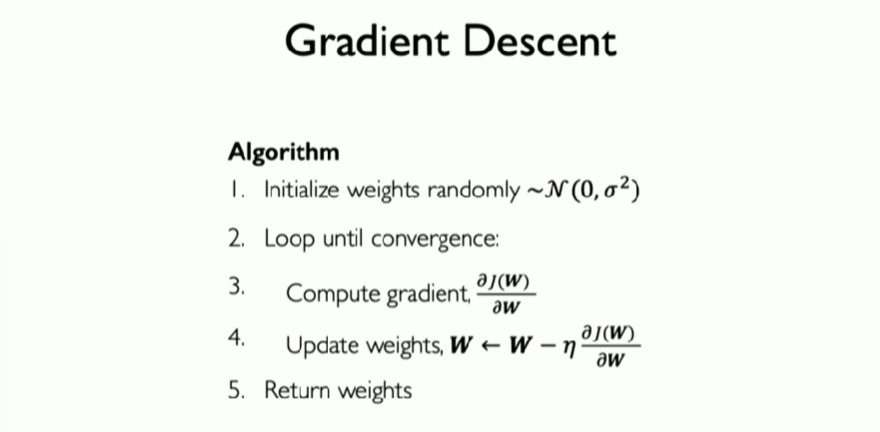

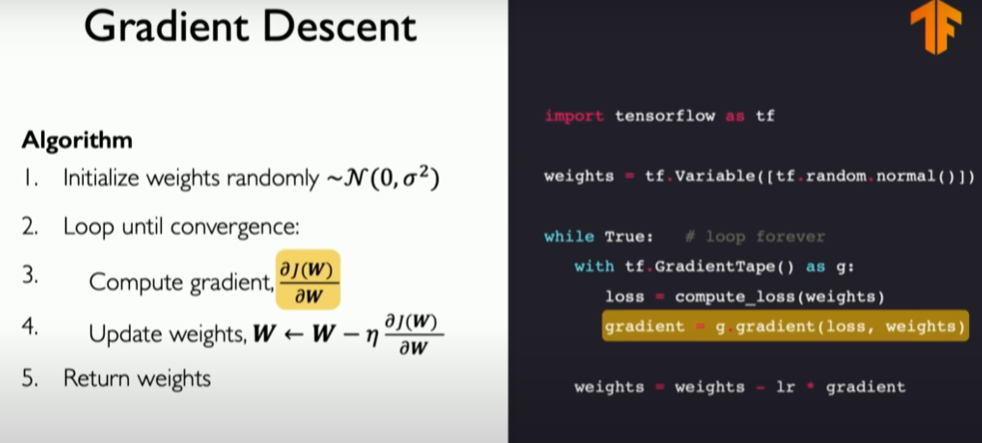

**Back propagation**
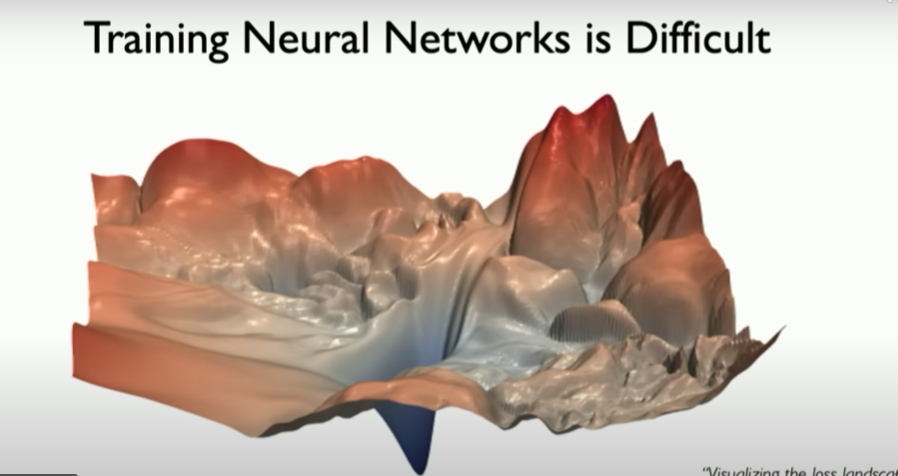

#### How to set the learnig rates
1. Try lots of different learning rattes and see what works just right
2. Design an adaptuve learning rate that "adapts" to the landscape

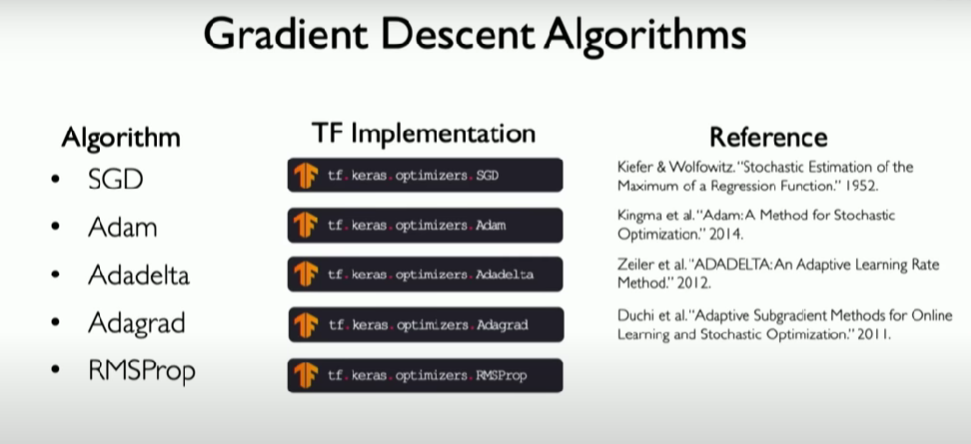

#### Mini Batches
- Faster training
- Parallel computing

#### Visualizing a models layers

In [28]:
# Get summary of the model
model_x.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model

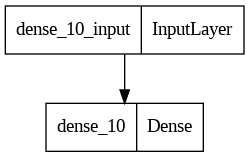

In [30]:
plot_model(model_x)

In [31]:
# Create model
model_y = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile model
model_y.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit model
model_y.fit(tf.expand_dims(X_train, -1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 9ms/step - loss: 46.9103 - mae: 46.9103
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 39.9440 - mae: 39.9440
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 36.9696 - mae: 36.9696
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 28.4466 - mae: 28.4466
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 24.7597 - mae: 24.7597
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 19.3181 - mae: 19.3181
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 21.7869 - mae: 21.7869
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 11.1480 - mae: 11.1480
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 9.6511 - mae: 9.6511
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 29.3293 - mae: 29.3293
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 

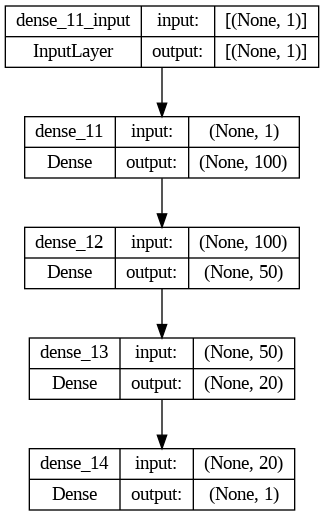

In [32]:
plot_model(model_y, show_shapes=True)

In [33]:
# Another model
model_z = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="One of many models")

# Compile the model

model_z.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

In [34]:
model_z.summary()

Model: "One of many models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


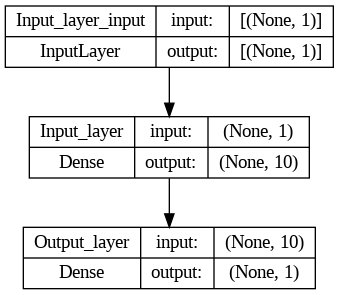

In [35]:
plot_model(model_z, show_shapes=True)

### Visualizing models predictions
To visualize predictions is a good idea to plot them againts the ground labels

often we will see this as Y_test of Y_true VS Y_pred

In [36]:
# Make some predictions
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 82ms/step


array([[ 70.391426],
       [ 74.41315 ],
       [ 78.43485 ],
       [ 82.45649 ],
       [ 86.47813 ],
       [ 90.49977 ],
       [ 94.521416],
       [ 98.54282 ],
       [102.563866],
       [106.58489 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

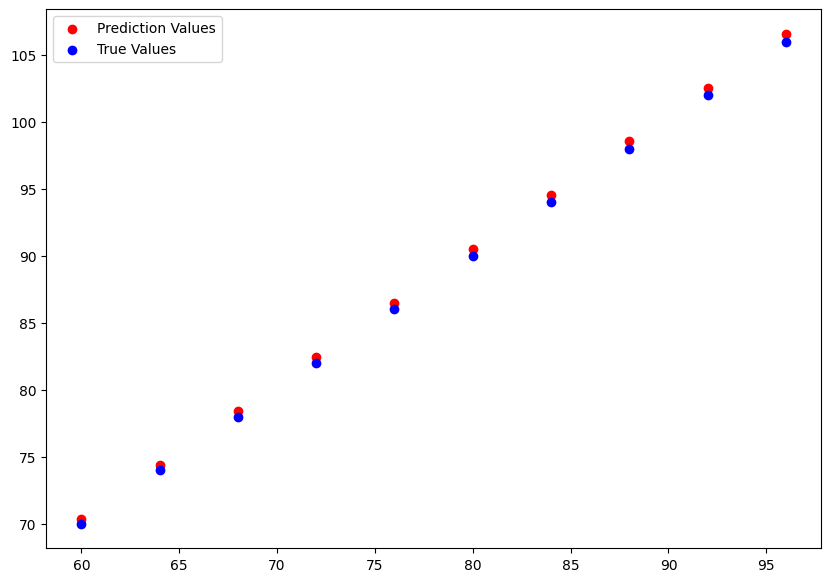

In [38]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_pred, c="r", label="Prediction Values")
plt.scatter(X_test, y_test, c="b", label="True Values")
plt.legend();

In [39]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  Plot training data, test data and compares predictins to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(test_data, predictions, c="r", label="Prediction Values")
  plt.scatter(test_data, test_labels, c="b", label="True Values")
  plt.scatter(train_data, train_labels, c="g", label="Training data")
  plt.legend();

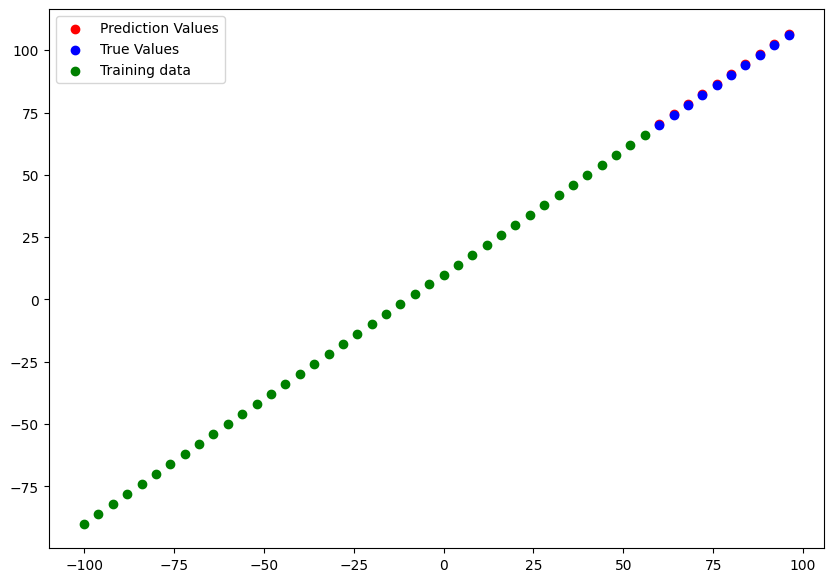

In [40]:
plot_predictions()

### Evaluating our models predictions with evaluations metrics

Depending on the problem, there will be different evaluation metrics to evaluate your models performance

* MAE  - On average how wrong is each of my models predictions
* MSE - Square the average errors (Use when larger error are more significant than smaller errors)

In [41]:
# Evaluate the model o the test set
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.4887 - mae: 0.4887


[0.4886833131313324, 0.4886833131313324]

In [42]:
y_pred.shape

(10, 1)

In [43]:
y_pred = tf.squeeze(y_pred)
y_pred.shape

TensorShape([10])

In [44]:
y_test.shape

TensorShape([10])

In [45]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [46]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.48868102>

In [47]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.48868102>

In [48]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.24263361>

In [49]:
# Functions for MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))


### Running experimets to improve our model

Build a model > Fit it > Evaluate > Tweak

*Machine learning practitioners motto*

Experiment, experiment, experiment

1. Get more data (More examples)
2. Make your model larger (More layers, deeper model)
3. Train for longer

In [50]:
model_1.predict([18.0])

1/1 [==============================] - 0s 56ms/step


array([[28.105412]], dtype=float32)

Lets do 3 modelling experiments
1. 1 layer 100 epochs
2. 2 layers, trained for 100 epochs
3. 2 layers 500 epochs

In [51]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

**Model A**

1 dense layer 100 epochs

In [52]:
# Model A

# Create model
tf.random.set_seed(42)
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_a.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# Fit the model
model_a.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 17.1730 - mae: 17.1730
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3870 - mae: 12.3870
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7130 - mae: 11.7130
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.3147 - mae: 9.3147
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1864 - mae: 10.1864
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4462 - mae: 9.4462
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5831 - mae: 8.5831
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0414 - mae: 9.0414
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 18.7911 - mae: 18.7911
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1333 - mae: 10.1333
Epoch 11/100
2/2 [==============================] - 0s 6ms/step 

In [53]:
y_pred_a = model_a.predict(X_test)
y_pred_a

1/1 [==============================] - 0s 51ms/step


array([[42.877853],
       [45.648834],
       [48.419815],
       [51.190796],
       [53.96178 ],
       [56.73276 ],
       [59.503742],
       [62.274727],
       [65.04571 ],
       [67.81669 ]], dtype=float32)

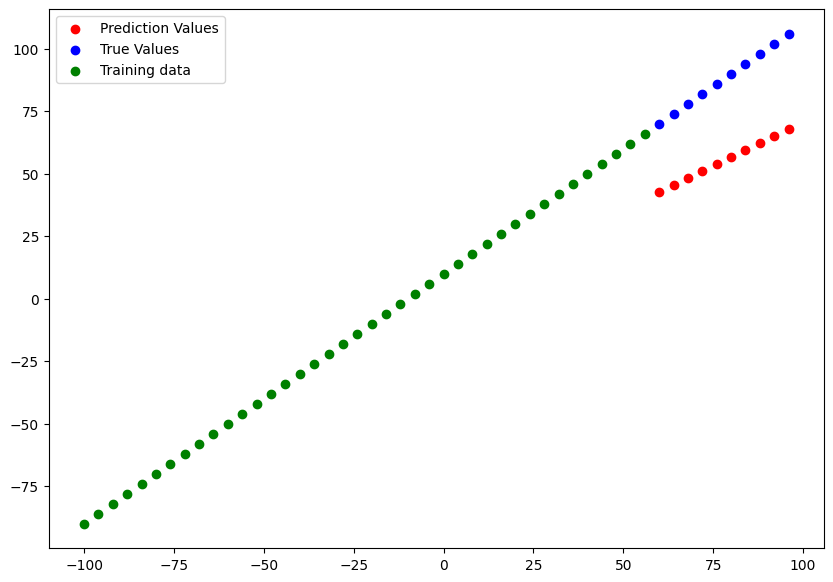

In [54]:
plot_predictions(predictions=y_pred_a)

In [55]:
mae_a = mae(y_test, y_pred_a)
mae_a

<tf.Tensor: shape=(), dtype=float32, numpy=32.65273>

In [56]:
mse_a = mse(y_test, y_pred_a)
mse_a

<tf.Tensor: shape=(), dtype=float32, numpy=1078.6624>

**Model B**

2 dense layers 100 epochs

In [57]:
# Model B

# Create model

model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_b.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_b.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 36.3165 - mae: 36.3165
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 21.2463 - mae: 21.2463
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 16.0185 - mae: 16.0185
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 6.9256 - mae: 6.9256
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3947 - mae: 12.3947
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1692 - mae: 10.1692
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2554 - mae: 12.2554
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9809 - mae: 12.9809
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 25.5915 - mae: 25.5915
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8708 - mae: 12.8708
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

In [58]:
y_pred_b = model_b.predict(X_test)
y_pred_b

1/1 [==============================] - 0s 84ms/step


array([[58.325478],
       [62.167103],
       [66.00872 ],
       [69.85032 ],
       [73.69192 ],
       [77.533516],
       [81.375114],
       [85.21671 ],
       [89.058304],
       [92.899895]], dtype=float32)

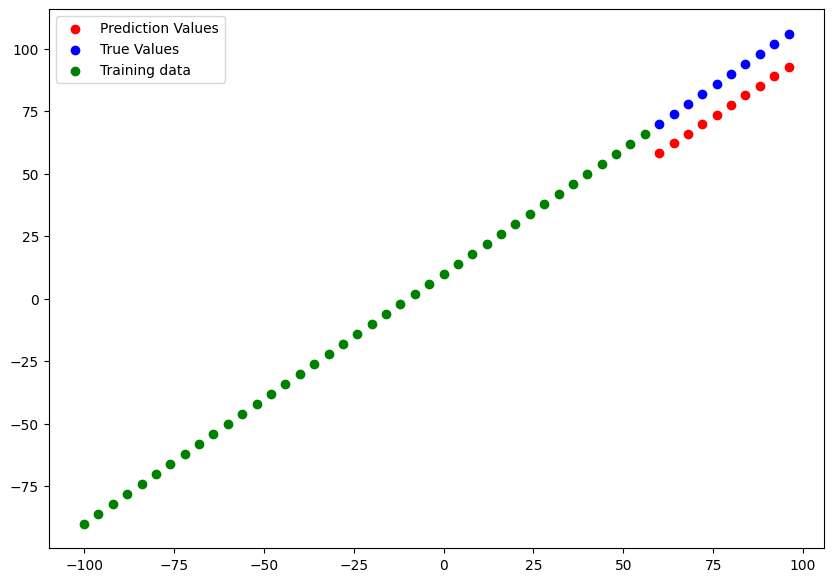

In [59]:
plot_predictions(predictions=y_pred_b)

In [60]:
mae_b = mae(y_test, y_pred_b)
mse_b = mse(y_test, y_pred_b)
mae_b, mse_b

(<tf.Tensor: shape=(), dtype=float32, numpy=12.387292>,
 <tf.Tensor: shape=(), dtype=float32, numpy=153.65201>)

**Model C**

2 Dense layers 500 epochs

In [61]:
# Model C

# Create Model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_c.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_c.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 39.1954 - mae: 39.1954
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 23.5779 - mae: 23.5779
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 19.5754 - mae: 19.5754
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 4.6072 - mae: 4.6072
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 13.1137 - mae: 13.1137
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1047 - mae: 9.1047
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.2564 - mae: 10.2564
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.6061 - mae: 12.6061
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 28.3893 - mae: 28.3893
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 17.1561 - mae: 17.1561
Epoch 11/500
2/2 [==============================] - 0s 7ms/st

In [62]:
y_pred_c = model_c.predict(X_test)
y_pred_c

1/1 [==============================] - 0s 90ms/step


array([[ 75.09768 ],
       [ 79.8655  ],
       [ 84.63332 ],
       [ 89.401146],
       [ 94.16897 ],
       [ 98.93679 ],
       [103.70461 ],
       [108.47242 ],
       [113.24025 ],
       [118.008064]], dtype=float32)

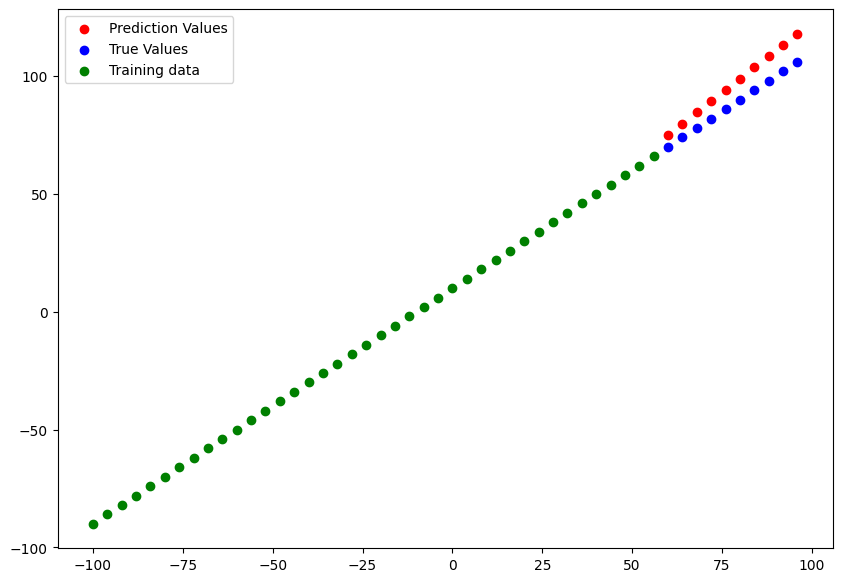

In [63]:
plot_predictions(predictions=y_pred_c)

In [64]:
mae_c = mae(y_test, y_pred_c)
mse_c = mse(y_test, y_pred_c)
mae_c, mse_c

(<tf.Tensor: shape=(), dtype=float32, numpy=8.5528755>,
 <tf.Tensor: shape=(), dtype=float32, numpy=78.01546>)

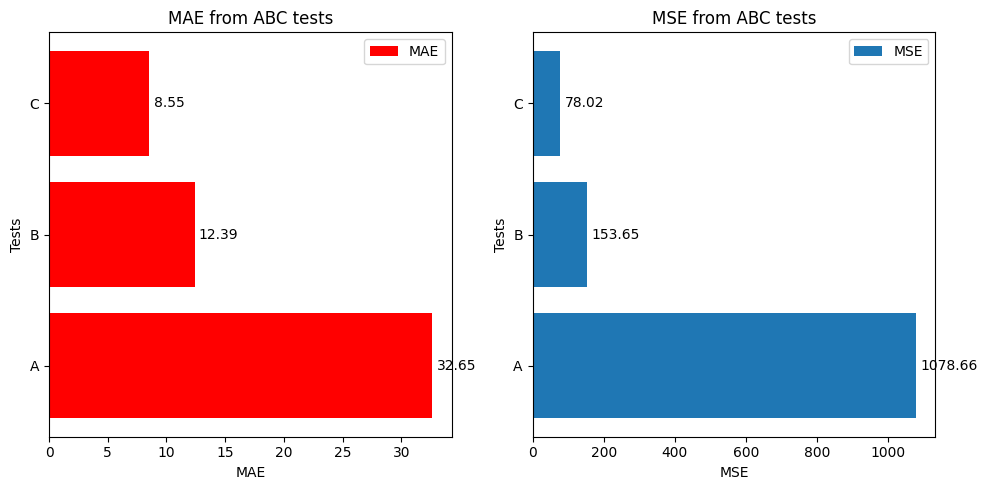

In [65]:
import matplotlib.pyplot as plt

# Sample data (replace these with your actual values)
mae_abc = [mae_a, mae_b, mae_c]
mse_abc = [mse_a, mse_b, mse_c]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot MAE on the first subplot
mae_bars = axes[0].barh(["A", "B", "C"], mae_abc, label="MAE", color="r")
axes[0].set_xlabel("MAE")
axes[0].set_ylabel("Tests")
axes[0].set_title("MAE from ABC tests")

# Plot MSE on the second subplot
mse_bars = axes[1].barh(["A", "B", "C"], mse_abc, label="MSE")
axes[1].set_xlabel("MSE")
axes[1].set_ylabel("Tests")
axes[1].set_title("MSE from ABC tests")

# Function to add annotations to the bars
def add_bar_annotations(bars, ax):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',  # Display value with 2 decimal places
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset from the bar
                    textcoords="offset points",
                    ha='left', va='center')

# Add annotations to the MAE bars
add_bar_annotations(mae_bars, axes[0])

# Add annotations to the MSE bars
add_bar_annotations(mse_bars, axes[1])

# Add legend to both subplots
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()


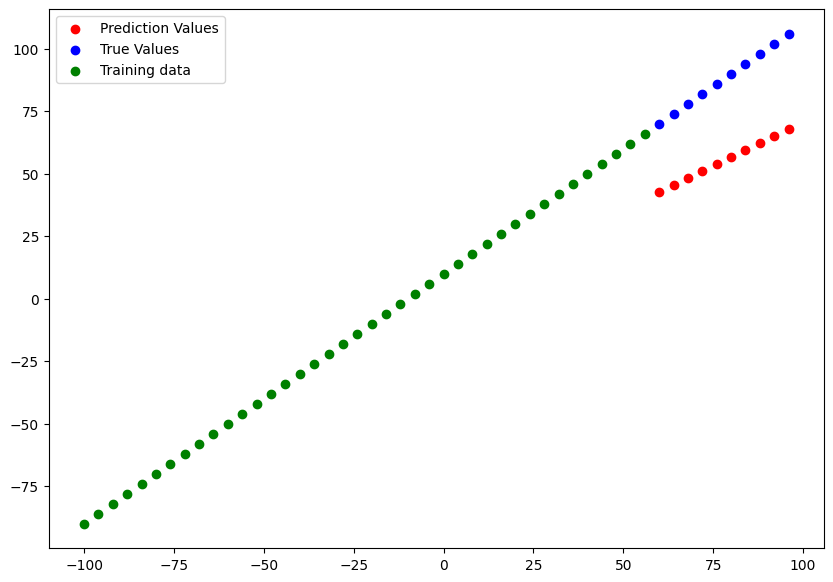

In [66]:
plot_predictions(predictions=y_pred_a)

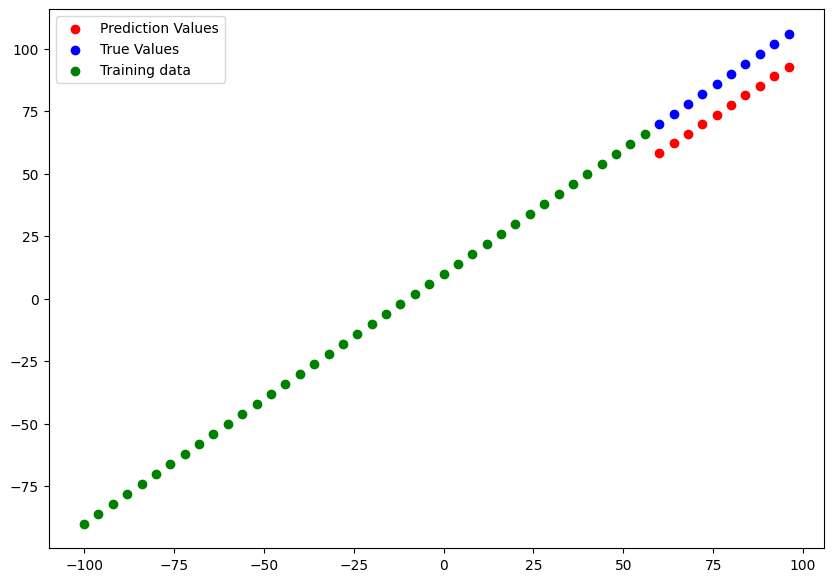

In [67]:
plot_predictions(predictions=y_pred_b)

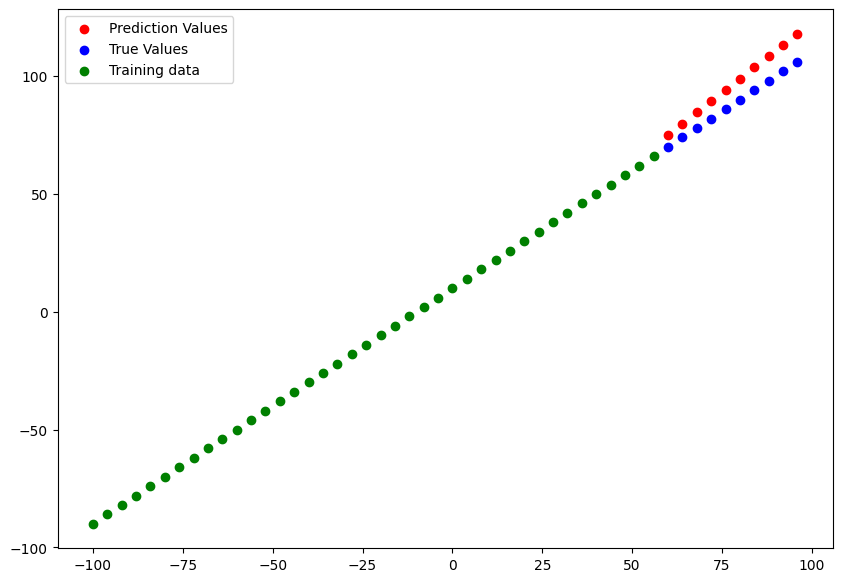

In [68]:
plot_predictions(predictions=y_pred_c)

**Best Model So Far**

model_1

In [69]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

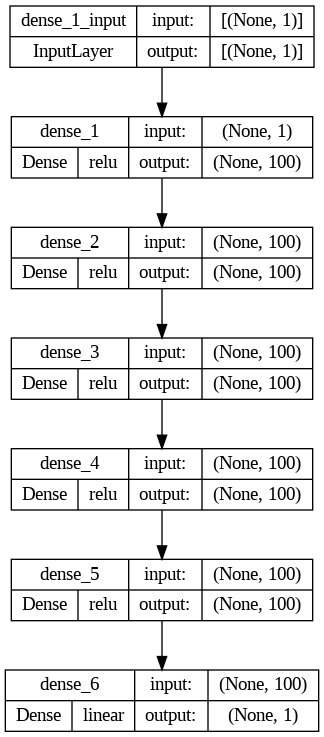

In [70]:
plot_model(model_1, show_shapes=True, show_layer_activations=True)

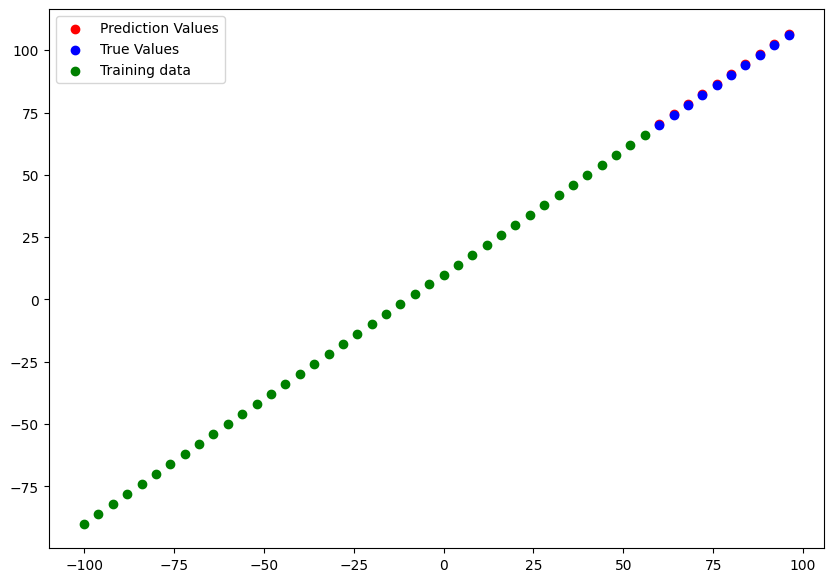

In [71]:
plot_predictions(predictions=y_pred)

In [72]:
mae_1 = mae(y_test, y_pred)
mse_1 = mse(y_test, y_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.48868102>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.24263361>)

In [73]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 57ms/step - loss: 0.4887 - mae: 0.4887


[0.4886833131313324, 0.4886833131313324]

In [74]:
import pandas as pd
model_results = [["Model_1", mae_1.numpy(), mse_1.numpy()],
                ["Model_A", mae_a.numpy(), mse_a.numpy()],
                ["Model_B", mae_b.numpy(), mse_b.numpy()],
                ["Model_C", mae_c.numpy(), mse_c.numpy()]]
df_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
df_results

Model        MAE          MSE
0  Model_1   0.488681     0.242634
1  Model_A  32.652729  1078.662354
2  Model_B  12.387292   153.652008
3  Model_C   8.552876    78.015457

In [75]:
model_1.predict([10.0])

1/1 [==============================] - 0s 55ms/step


array([[20.04375]], dtype=float32)

**Tensorboard**

### Saving models

Saving models allows us to use them outside Google Collab, such as webapplications or web apps

**To retrieve model**
tf.keras.models.load_model

**To save model**
model.save("path/model_name")

1. SaveModel Format
2. The HDF5 Format

In [76]:
# Save using the save model format
model_1.save("Best_model_SavedModel_Format")

In [77]:
# Save model using HDF5 format
model_1.save("Best_Model_HDF5_format.h5")

### SE ME BORRO TODO MI PINCHE AVANCE ME LLEVA LA VERG


In [78]:
import pandas as pd
df = pd.read_csv("/content/insurance.csv")

In [79]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<Axes: >

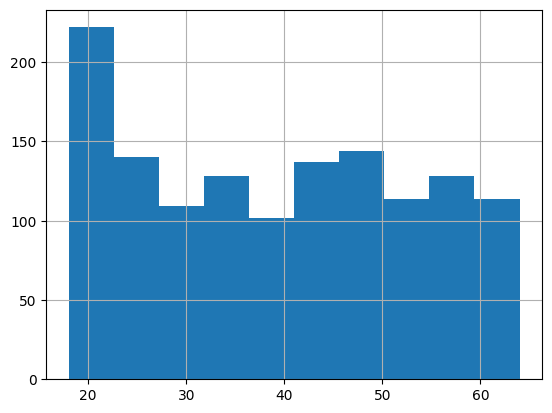

In [80]:
df["age"].hist()

<Axes: >

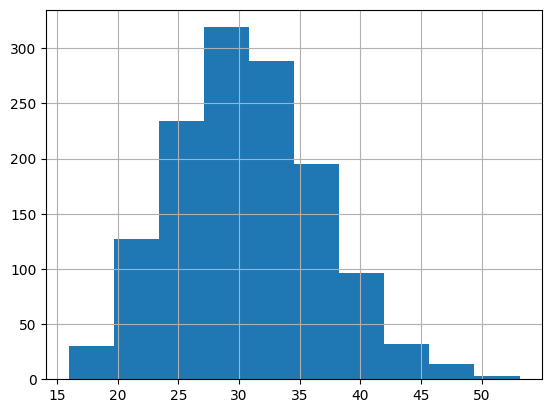

In [81]:
df['bmi'].hist()

In [82]:
from sklearn.preprocessing import OneHotEncoder
df_dummies = pd.get_dummies(df)


In [83]:
X = df_dummies.drop("charges", axis=1)
y = df_dummies["charges"]

In [84]:
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

## Create model

In [86]:
# Build a model
model_dummy = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_dummy.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# Fit the model
model_dummy.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13265.5908 - mae: 13265.5908
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13078.2656 - mae: 13078.2656
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12708.2246 - mae: 12708.2246
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12002.0352 - mae: 12002.0352
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10845.0137 - mae: 10845.0137
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9404.4961 - mae: 9404.4961
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8121.0010 - mae: 8121.0010
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.9092 - mae: 7528.9092
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7436.1021 - mae: 7436.1021
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7416.6069 - mae:

In [87]:
model_dummy.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4857.7520 - mae: 4857.7520


[4857.751953125, 4857.751953125]

In [88]:
y_pred = model_dummy.predict(X_test)
y_pred

9/9 [==============================] - 0s 2ms/step


array([[ 9879.726  ],
       [ 6115.822  ],
       [21887.729  ],
       [ 9621.913  ],
       [ 9204.382  ],
       [ 5315.6816 ],
       [ 1279.7842 ],
       [13463.183  ],
       [ 4110.987  ],
       [10515.922  ],
       [12876.64   ],
       [ 7914.595  ],
       [ 4644.0654 ],
       [18223.938  ],
       [20631.162  ],
       [17950.355  ],
       [10901.828  ],
       [17936.67   ],
       [ 9253.557  ],
       [16146.007  ],
       [ 4225.423  ],
       [ 7980.033  ],
       [  439.77496],
       [ 3034.421  ],
       [11280.825  ],
       [11605.257  ],
       [12273.292  ],
       [ 5049.376  ],
       [10462.247  ],
       [  682.9142 ],
       [ 8506.08   ],
       [11902.757  ],
       [ 2127.396  ],
       [ 5607.8853 ],
       [ 2805.2566 ],
       [ 8817.211  ],
       [ 1853.7759 ],
       [ 7956.578  ],
       [18999.33   ],
       [14387.519  ],
       [ 3208.4148 ],
       [ 2277.145  ],
       [11658.757  ],
       [11784.399  ],
       [ 5847.8413 ],
       [11

In [89]:
mae(y_pred, y_test)

<tf.Tensor: shape=(268,), dtype=float64, numpy=
array([ 8678.24905652,  8863.13248772, 14086.24024561,  8646.83567021,
        8609.69827271,  9086.61708029, 11690.80713944,  9641.75825909,
        9595.12501089,  8778.99748773,  9407.43219797,  8605.11937901,
        9337.59251323, 11970.11444765, 13339.41888012, 11825.11369893,
        8851.69902504, 11817.90296945,  8612.63408194, 10900.54320185,
        9535.83189789,  8601.54652936, 12528.54209949, 10238.00948331,
        8931.74348257,  9008.31855628,  9192.77562738,  9176.62752462,
        8770.18520636, 12285.4028783 ,  8589.6213131 ,  9084.68441743,
       10917.49372317,  8997.30880872, 10393.85273946,  8594.43639416,
       11149.11622457,  8602.77179463, 12401.07897443, 10055.95212389,
       10123.34224486, 10797.11191742,  9021.49392941,  9053.25866443,
        8930.10523115,  9048.42488411, 10242.14617109,  9754.84461456,
       11456.00537734,  9070.87425875,  9719.41307618, 11843.09672596,
        8602.77021318, 11875.

In [90]:
model_dummy.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               1200      
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


## Ding experiments to improve the model
1. Add more layers
2. Train for longer
3. IDK


In [91]:
# New model
tf.random.set_seed(42)

# Create model_a
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_a.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_a.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13074.6514 - mae: 13074.6514
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11031.8633 - mae: 11031.8633
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7465.4375 - mae: 7465.4375
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7308.5283 - mae: 7308.5283
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7235.0781 - mae: 7235.0781
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7156.0312 - mae: 7156.0312
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7067.9980 - mae: 7067.9980
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6970.9961 - mae: 6970.9961
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6869.9233 - mae: 6869.9233
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6764.2979 - mae: 6764.

In [92]:
model_a.predict(X_test)

9/9 [==============================] - 0s 2ms/step


array([[ 9243.142  ],
       [ 6065.3877 ],
       [44374.336  ],
       [ 9261.631  ],
       [32538.178  ],
       [ 5932.4395 ],
       [ 1181.5177 ],
       [13414.597  ],
       [ 3486.5403 ],
       [10222.044  ],
       [35822.56   ],
       [ 7829.267  ],
       [ 4288.1343 ],
       [41125.906  ],
       [43410.656  ],
       [40754.156  ],
       [10717.777  ],
       [40611.473  ],
       [ 8621.945  ],
       [38905.12   ],
       [ 4132.271  ],
       [ 8074.8213 ],
       [  840.872  ],
       [ 3293.1238 ],
       [10870.422  ],
       [11193.879  ],
       [12227.301  ],
       [ 5018.9766 ],
       [ 9850.679  ],
       [  609.3403 ],
       [ 8365.041  ],
       [11644.378  ],
       [ 2100.9065 ],
       [ 5164.7915 ],
       [ 3064.4304 ],
       [ 8860.622  ],
       [ 1965.9065 ],
       [ 7908.415  ],
       [41506.336  ],
       [37237.08   ],
       [ 3278.0608 ],
       [ 2502.332  ],
       [11652.924  ],
       [11355.575  ],
       [ 5706.7124 ],
       [11

In [93]:
model_a.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.1033 - mae: 3170.1033


[3170.103271484375, 3170.103271484375]

In [94]:
# Another model

tf.random.set_seed(42)

# Create model
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_b.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history = model_b.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13209.9561 - mae: 13209.9561
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12283.8867 - mae: 12283.8867
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 9108.8867 - mae: 9108.8867
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7451.5557 - mae: 7451.5557
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7384.6406 - mae: 7384.6406
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7337.6060 - mae: 7337.6060
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7270.7505 - mae: 7270.7505
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7213.1387 - mae: 7213.1387
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7152.1377 - mae: 7152.1377
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7090.0601 - mae: 7090.

# Feature scaling

## Preprocessing data (Normalization and standarization)

Scaling type  |What it does| Function | When to use


Normalisation - Converts all values to between 0 and 1 - MinMaxScaler - Default Scaler with neural networks

Standarization - Removes the mean and divides each value by the standard deviation - StandardScaler - Transform feature to have close to normal distribuition

Neural networks prefer **normalization**

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv("/content/insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "region", "sex"])
)

# Create X and Y values

X = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform traning and test data with normalization, minmaxscaler
X_train_n = ct.transform(X_train)
X_test_n = ct.transform(X_test)

In [97]:
# What does the data look like now
X_train_n[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [98]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

## Build a model for the normalized data

In [99]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model_n  = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_n.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_n.fit(X_train_n, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 4s 4ms/step - loss: 13340.0312 - mae: 13340.0312
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13289.3848 - mae: 13289.3848
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13039.3350 - mae: 13039.3350
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12231.0273 - mae: 12231.0273
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10525.4863 - mae: 10525.4863
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 8690.9316 - mae: 8690.9316
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7961.0591 - mae: 7961.0591
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7795.0830 - mae: 7795.0830
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7651.3291 - mae: 7651.3291
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7503.7983 - mae:

In [100]:
model_n.evaluate(X_test_n, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3177.3689 - mae: 3177.3689


[3177.368896484375, 3177.368896484375]

In [101]:
model_n.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               1200      
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 10)                510       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


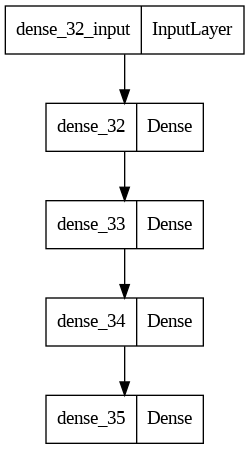

In [102]:
plot_model(model_n)

### Normalization gives us a faster conversion time (Get better results faster)

Extra activities

In [106]:
# Create the model intended

tf.random.set_seed(9)

# Build a model
model_extra = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
# Instantiate BinaryCrossentropy loss function
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Compile the model
model_extra.compile(loss=bce_loss,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit the model
model_extra.fit(X_train_n, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 9ms/step - loss: 205862.7656 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 205862.7656 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 205862.7656 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 205862.7500 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 205862.7500 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 205862.7812 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 205862.7500 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 205862.7500 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 205862.7656 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [========

In retrospective, shitty model but still doable